In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#from IPython.core.display import HTML
#css = open('style-table.css').read()+ open('style-notebook.css').read()
#HTML('<style>()</style>'.format(css))

In [2]:
titles= pd.read_csv('titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
cast = pd.read_csv('cast.csv') 
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

<Axes: xlabel='year'>

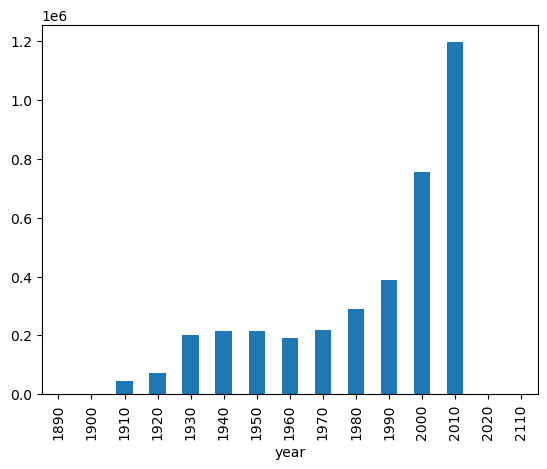

In [44]:
decade_films = cast.groupby((cast['year']//10)*10).size()
decade_films.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

<Axes: xlabel='year'>

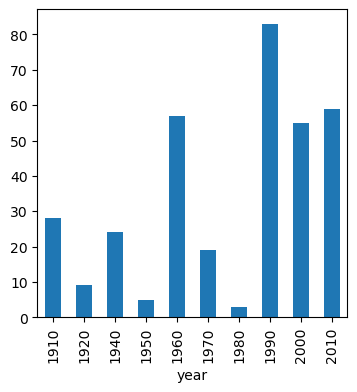

In [48]:
hamlet = cast.loc[cast['title']=="Hamlet"]
hamlet_films = hamlet.groupby((cast['year']//10)*10).size()
hamlet_films.plot(kind='bar', figsize=(4,4))

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [49]:
x = cast.loc[(cast['n']==1) & (cast['year']==1950)]
x['type'].groupby(x['type']).count()

type
actor      625
actress    288
Name: type, dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [51]:
x = cast.loc[(cast['n']>=1) &(cast['n']<=5) & (cast['year']==1950)]
x['type'].groupby(x['type']).count()

type
actor      2669
actress    1524
Name: type, dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [4]:
pink = cast.loc[cast['title'].str.contains("Pink Panther")]
pink['character'].groupby(pink['character']).count().sum()
#.groupby(cast['character']).count()

517

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [125]:
frank = cast.loc[(cast['name']=='Frank Oz')]

frank_year_sort = frank.sort_values('year')

frank_group_movie = frank_year_sort.groupby(frank['title']).count()



frank_group_movie.where(frank_group_movie['name']>1)


,title,year,name,type,character,n,decade
title,,,,,,,
An American Werewolf in London,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Blues Brothers 2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Follow That Bird,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Innocent Blood,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inside Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Labyrinth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Monsters, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Muppet Treasure Island,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Muppets from Space,4.0,4.0,4.0,4.0,4.0,4.0,4.0


### List each of the characters that Frank Oz has portrayed at least twice.

In [153]:
frank = cast.loc[(cast['name']=='Frank Oz')]


frank_group = frank.groupby(frank['character']).count()
frank_group.where(frank_group['name']>1)


#frank_group_movie.where(frank_group_movie['name']>1)


,title,year,name,type,n,decade
character,,,,,,
Animal,6.0,6.0,6.0,6.0,6.0,6.0
"Aughra, a Keeper Of Secrets (performer)",NaN,NaN,NaN,NaN,NaN,NaN
Bert,3.0,3.0,3.0,3.0,3.0,3.0
Brain Surgeon,NaN,NaN,NaN,NaN,NaN,NaN
Chamberlain (performer),NaN,NaN,NaN,NaN,NaN,NaN
Cookie Monster,5.0,5.0,5.0,5.0,4.0,5.0
Corrections Officer,NaN,NaN,NaN,NaN,NaN,NaN
Corrupt Cop,NaN,NaN,NaN,NaN,NaN,NaN
Doc Hopper's Men,NaN,NaN,NaN,NaN,NaN,NaN
